In [1]:
import pandas as pd

In [2]:
## Data Ingestions step
df=pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.isnull().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [4]:
# No missing values in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
## Lets drop id column
df=df.drop(labels=['id'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
## check forduplicated records
df.duplicated().sum()

34

In [8]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26967 rows x 10 columns]>

In [9]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print("Categorical columns:",categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[categorical_columns].describe()

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [11]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [12]:
df['cut'].nunique()

5

In [13]:
df['cut'].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [14]:
df['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [15]:
df['clarity'].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

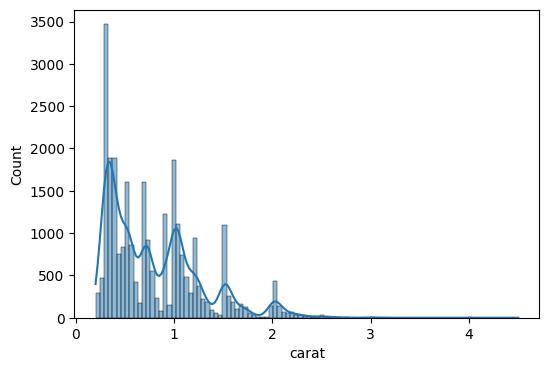

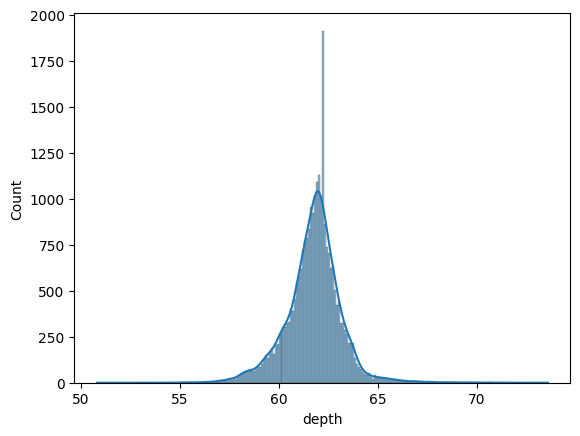

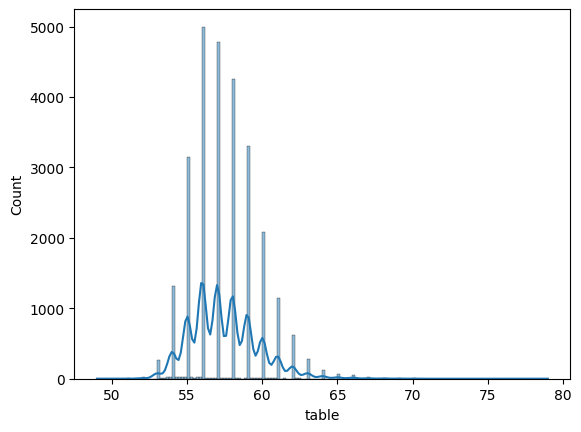

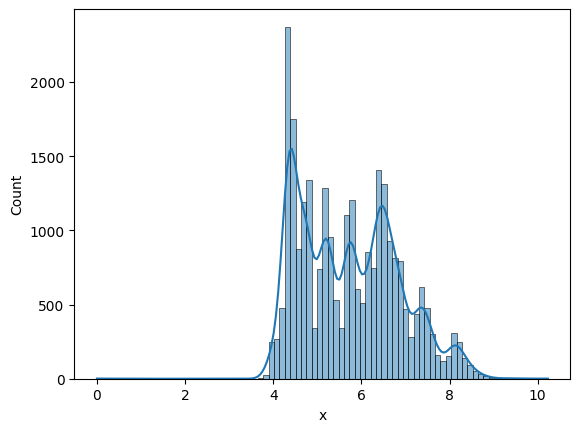

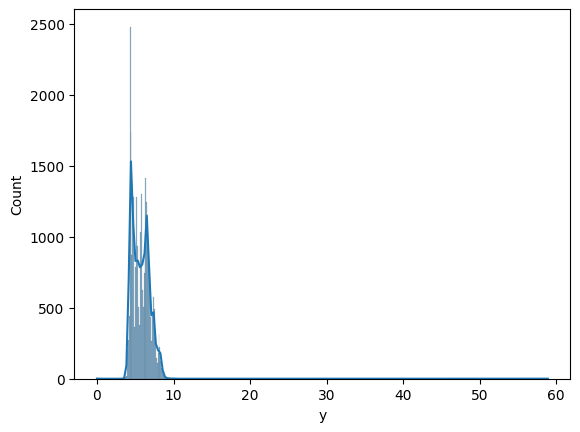

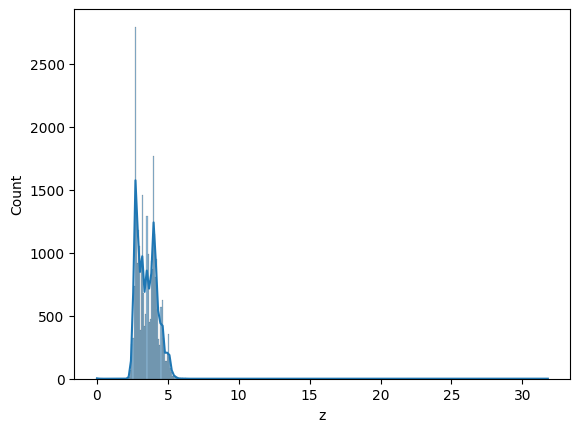

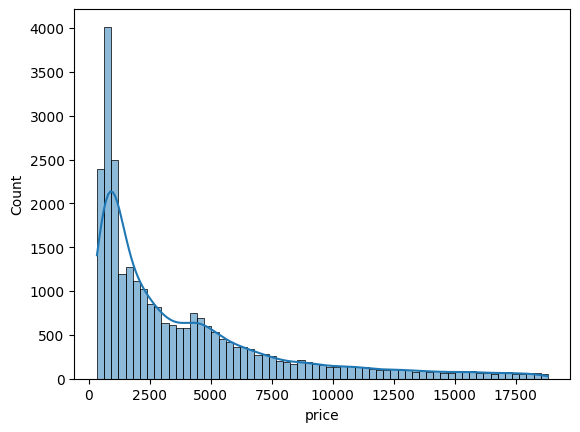

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


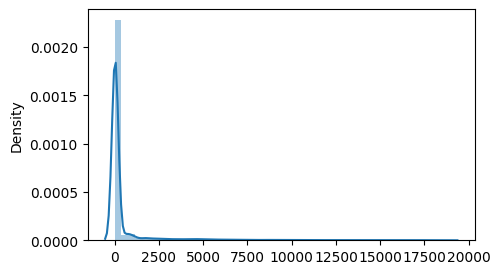

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


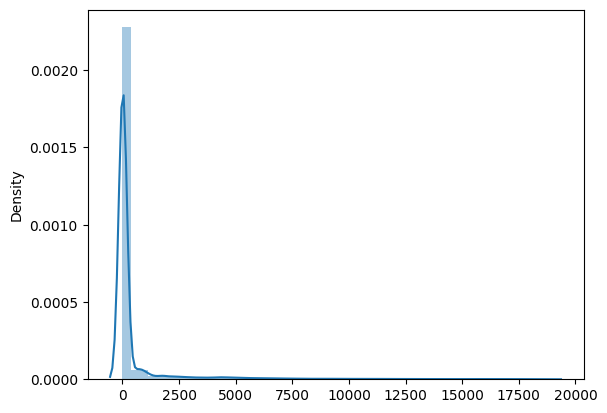

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


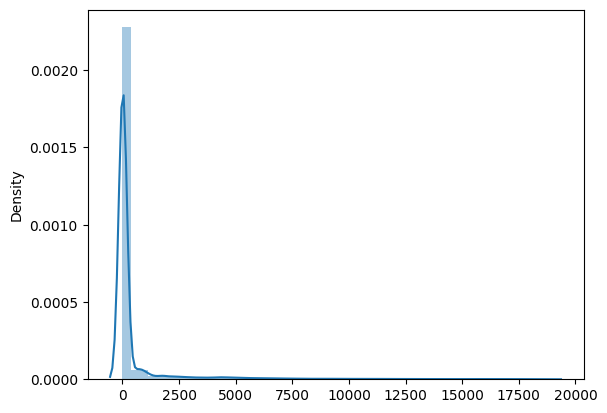

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


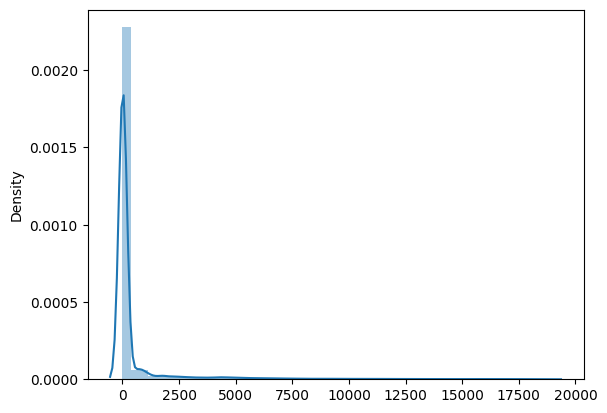

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


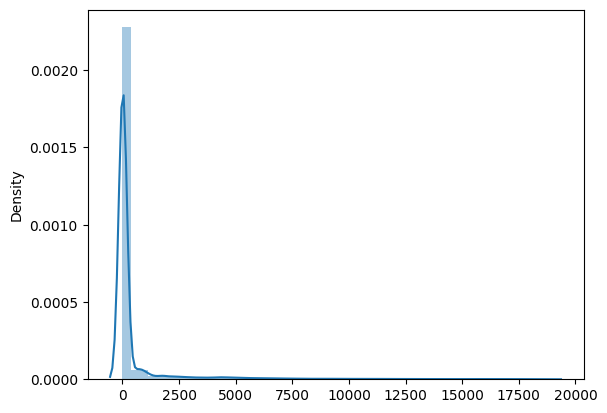

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


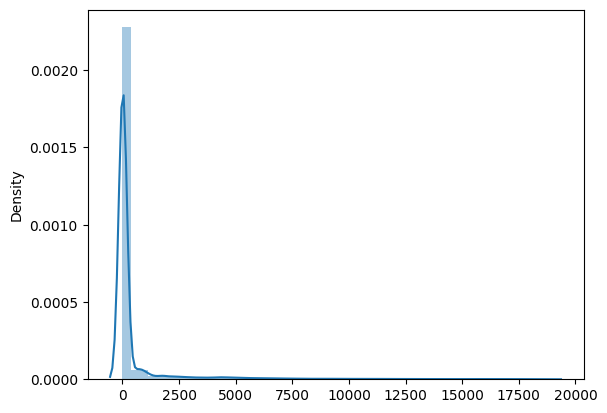

C:\Users\arpit\AppData\Local\Temp\ipykernel_18508\1915026954.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns])


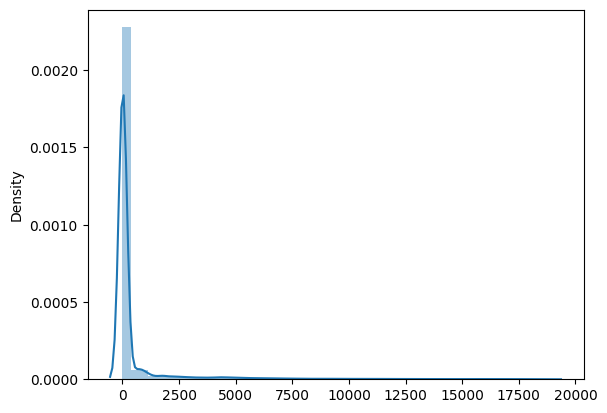

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
x=1
for i in numerical_columns:
    sns.distplot(df[numerical_columns])
    print('\n')
    plt.show()

<Axes: >

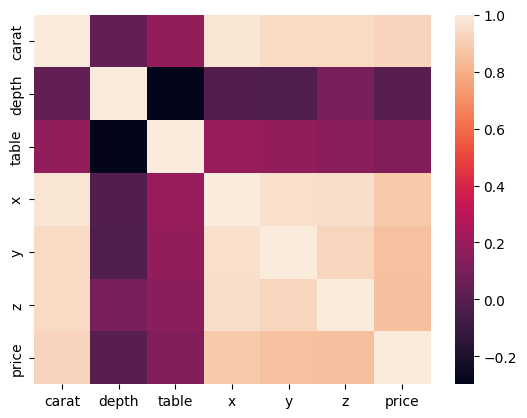

In [18]:
## corelation = statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables.
sns.heatmap(df[numerical_columns].corr())

In [19]:
#currently we will not execute this
#df.drop(label=['x','y','z'],axis=1) You're the best <3


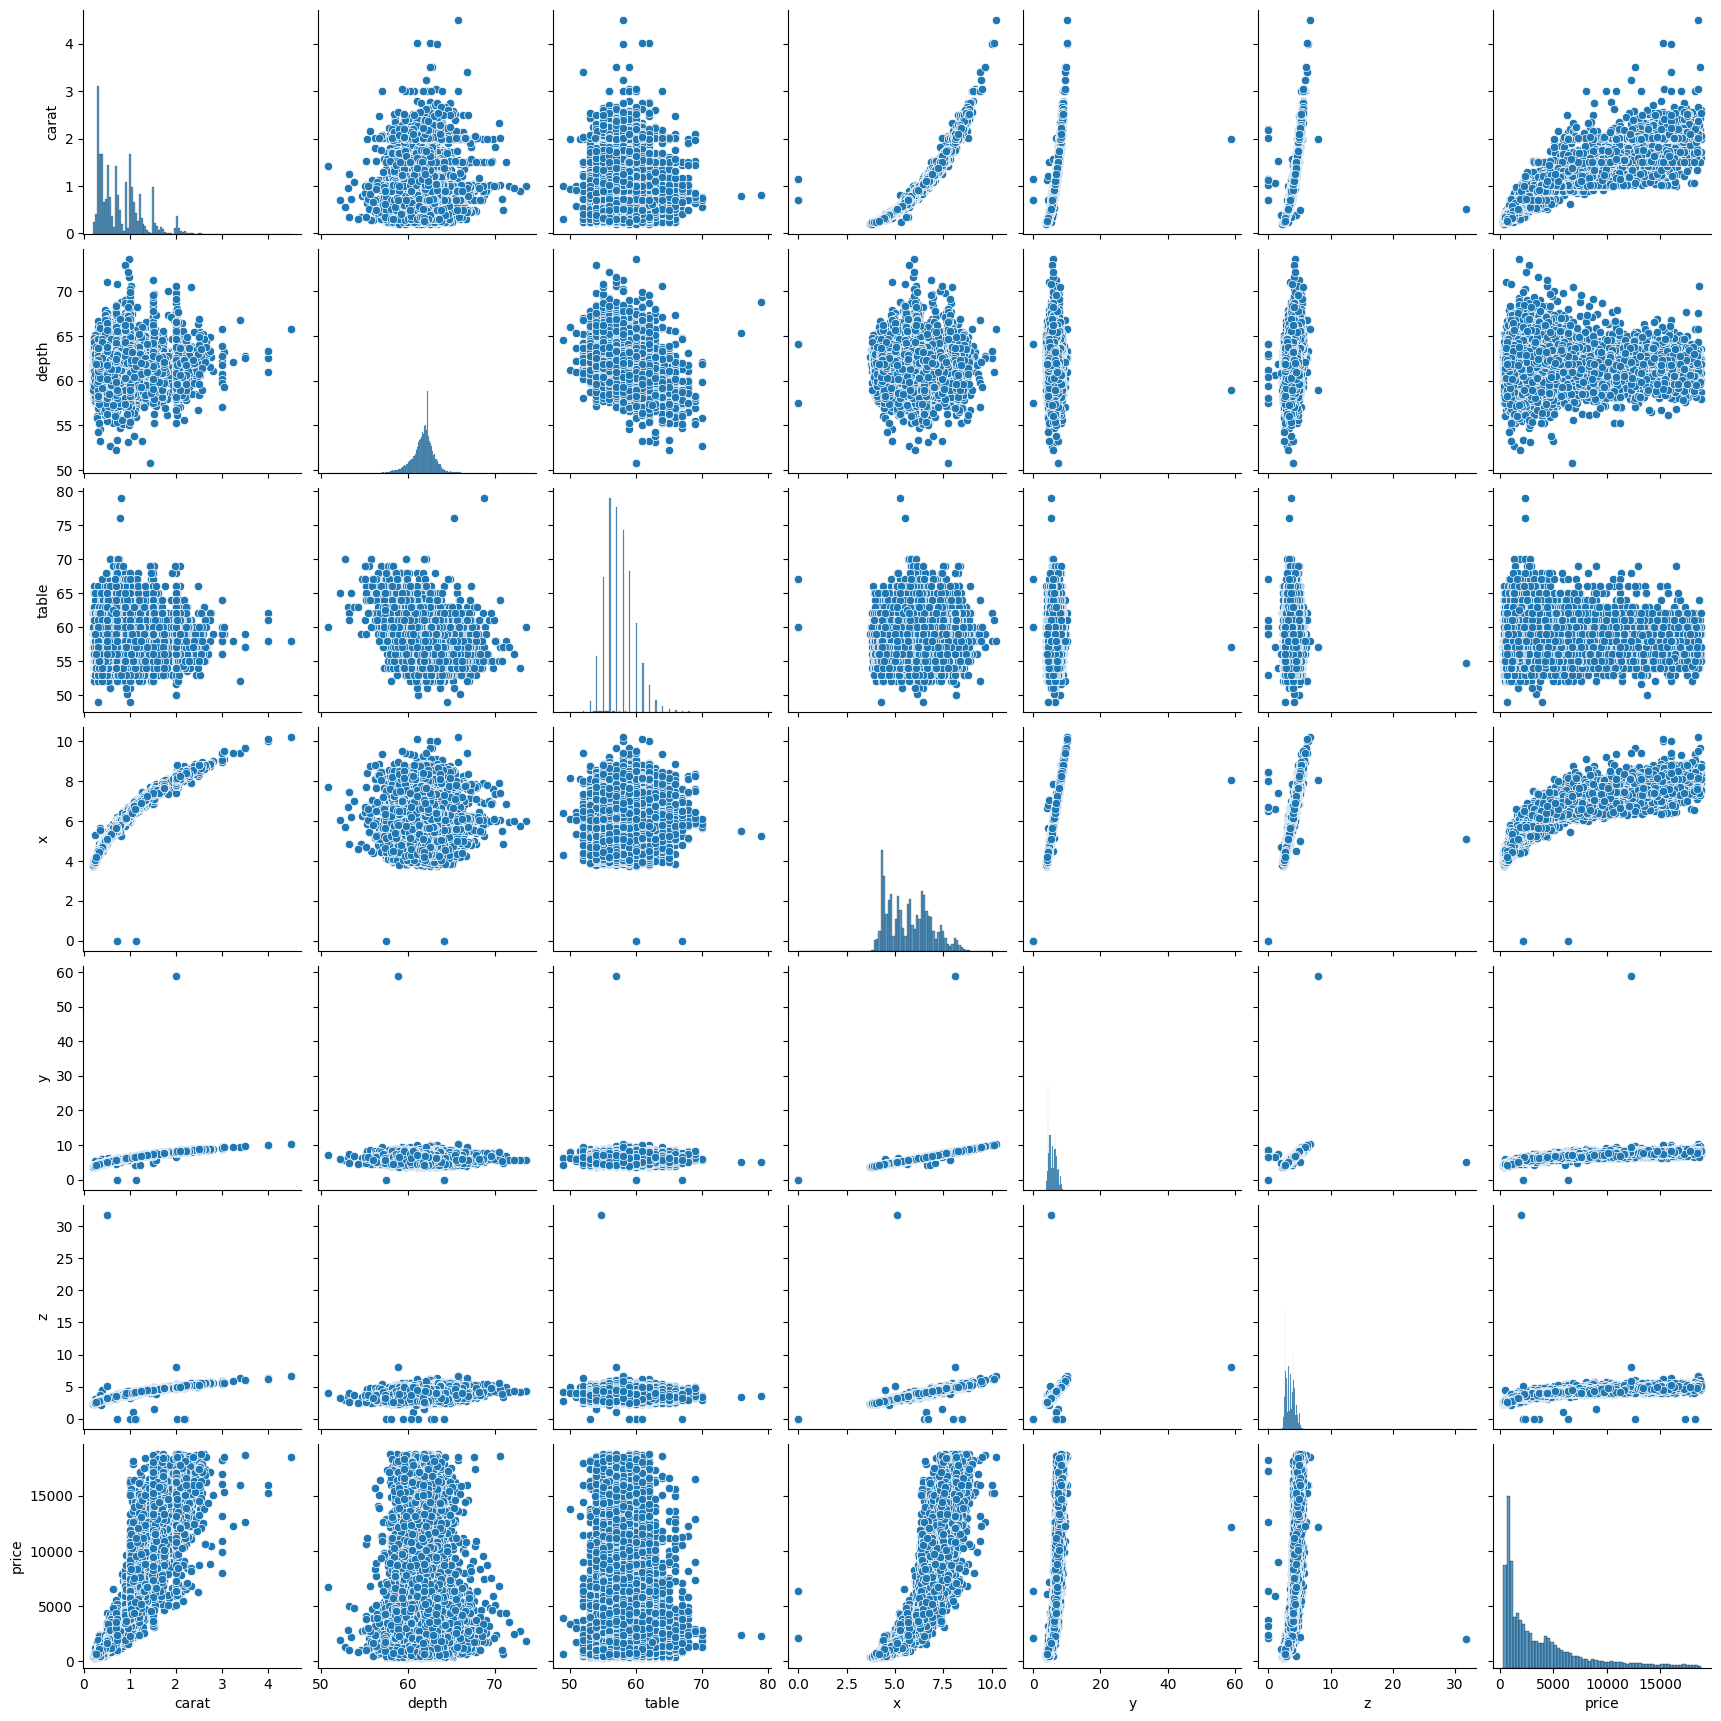

In [20]:
sns.pairplot(df)

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [22]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [23]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [24]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [25]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [26]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [27]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [28]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
